# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress 


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mice_data = pd.merge(mouse_metadata, study_results, how = "outer", on="Mouse ID")

# Display the data table for preview
combined_mice_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [60]:
# Checking the number of mice.
number_mice = combined_mice_data["Mouse ID"].nunique()
number_mice

249

In [43]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = combined_mice_data[combined_mice_data.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [48]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = combined_mice_data[combined_mice_data["Mouse ID"].isin(dup_mice_ID)]
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = combined_mice_data.drop_duplicates(["Mouse ID", "Timepoint"], keep = False)
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [61]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data["Mouse ID"].nunique()

249

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_groups = clean_mouse_data.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = drug_groups["Tumor Volume (mm3)"].mean()
median_tumor = drug_groups["Tumor Volume (mm3)"].median()
variance_tumor = drug_groups["Tumor Volume (mm3)"].var()
std_dev_tumor = drug_groups["Tumor Volume (mm3)"].std()
std_err_tumor = drug_groups["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_table = pd.DataFrame({"Mean Tumor Volume": mean_tumor, 
                              "Median Tumor Volume": median_tumor, 
                              "Tumor Volume Variance": variance_tumor,
                              "Tumor Volume Std. Dev.": std_dev_tumor,
                              "Tumor Volume Std. Err.": std_err_tumor
})

summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

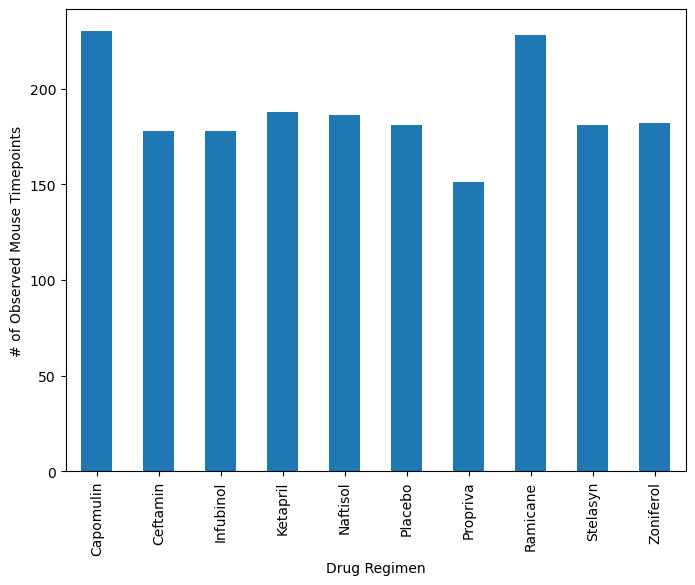

In [84]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
number_drug_groups = clean_mouse_data.groupby("Drug Regimen").count()["Mouse ID"]

number_drug_groups.plot(kind = "bar", figsize = (8,6), ylabel = "# of Observed Mouse Timepoints")

plt.show()

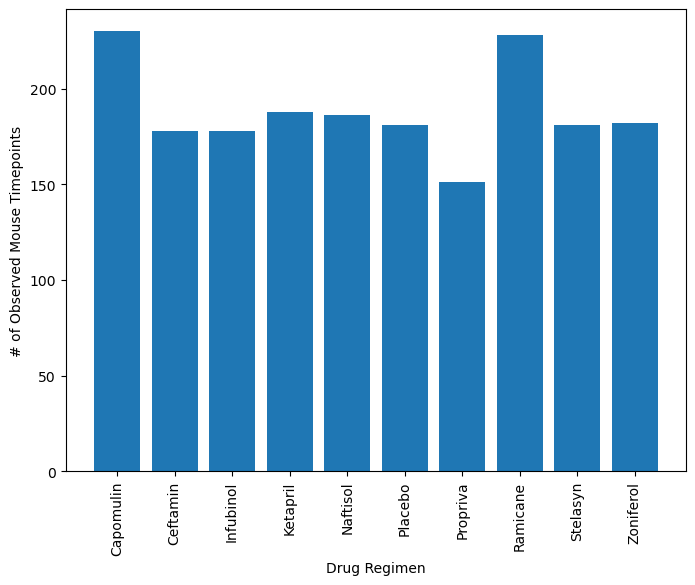

In [100]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize = (8,6))
plt.bar(number_drug_groups.index, number_drug_groups.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show()

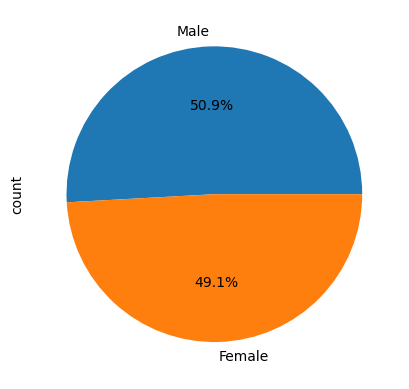

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender = clean_mouse_data["Sex"].value_counts()

mice_gender.plot(kind = "pie", autopct = "%1.1f%%")

plt.show()


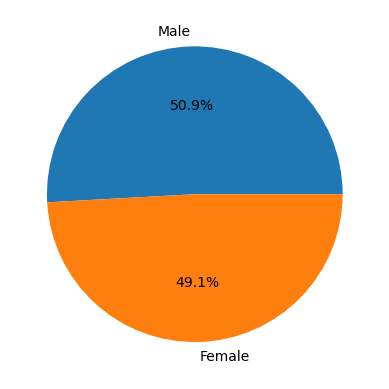

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mice_gender, labels = mice_gender.index, autopct = "%1.1f%%")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


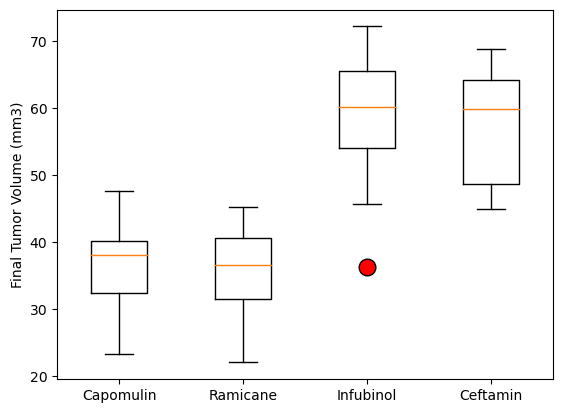

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

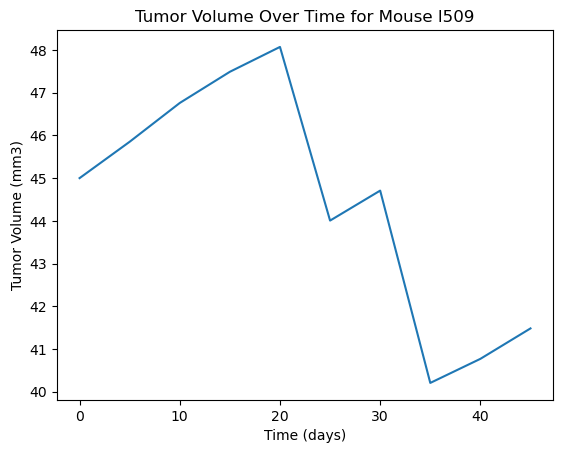

In [121]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

Capomulin_mouse = clean_mouse_data.loc[clean_mouse_data["Mouse ID"] == "l509"]

x_axis = Capomulin_mouse["Timepoint"]
y_axis = Capomulin_mouse["Tumor Volume (mm3)"]


plt.plot(x_axis, y_axis)

plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time for Mouse l509")

plt.show()

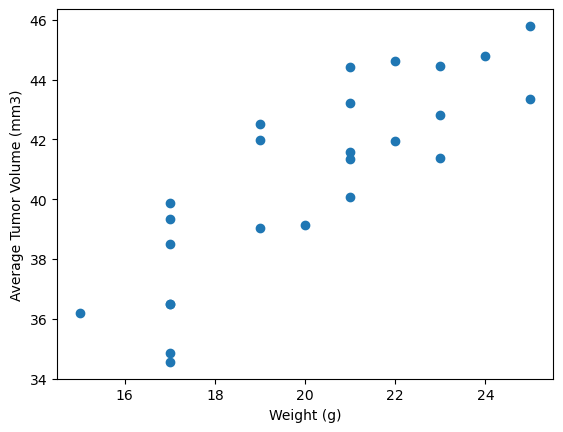

In [134]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Capomulin_test = clean_mouse_data[clean_mouse_data["Drug Regimen"] == "Capomulin"]
Capomulin_average_tumor = pd.DataFrame(Capomulin_test.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

Capomulin_average_tumor = pd.merge(Capomulin_test, Capomulin_average_tumor, on = "Mouse ID")

average_tumor_final = Capomulin_average_tumor[["Weight (g)", "avg_tumor_vol"]].drop_duplicates()
average_tumor_final

plt.scatter(average_tumor_final["Weight (g)"], average_tumor_final["avg_tumor_vol"])

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694722


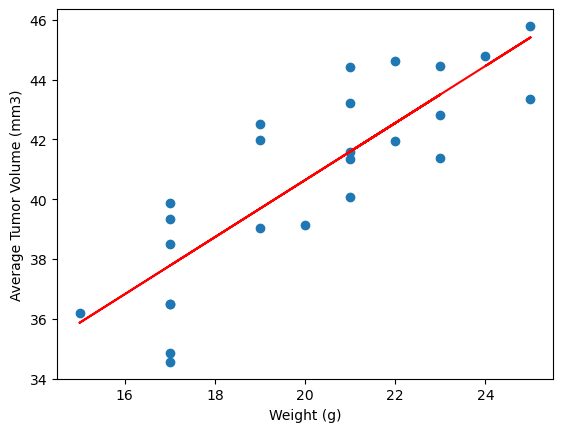

In [145]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
Capomulin_test = clean_mouse_data[clean_mouse_data["Drug Regimen"] == "Capomulin"]
Capomulin_average_tumor = pd.DataFrame(Capomulin_test.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

Capomulin_average_tumor = pd.merge(Capomulin_test, Capomulin_average_tumor, on = "Mouse ID")

average_tumor_final = Capomulin_average_tumor[["Weight (g)", "avg_tumor_vol"]].drop_duplicates()
average_tumor_final

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

slope, intercept, rvalue, pvalue, stderr = linregress(average_tumor_final["Weight (g)"], average_tumor_final["avg_tumor_vol"])

regression = (average_tumor_final["Weight (g)"]) * slope + intercept

print(f"The correlation between mouse weight and the average tumor volume is {rvalue}")

plt.scatter(average_tumor_final["Weight (g)"], average_tumor_final["avg_tumor_vol"])
plt.plot(average_tumor_final["Weight (g)"], regression, "r-")
plt.show()